# Behaviour of the S&P500 in the close

In [18]:
import sys
sys.executable # Check in which virtual environment I am operating

'/Users/Armellini1/opt/anaconda3/envs/finenv/bin/python'

In [43]:
import numpy as np
import pandas as pd
# Module to retrieve data on financial instruments (similar to 'yahoo finance')
import yfinance as yf 
import matplotlib
from matplotlib import pyplot as plt
import datetime

## Import data

In [20]:
df = yf.download(tickers='^GSPC', period='1y', interval='1d')
df.drop(columns=['Adj Close', 'Open', 'High', 'Low'], inplace = True)

[*********************100%***********************]  1 of 1 completed


In [21]:
dft = yf.download(tickers='^GSPTSE', period='1y', interval='1d')
dft.drop(columns=['Adj Close', 'Open', 'High', 'Low'], inplace = True)

[*********************100%***********************]  1 of 1 completed


In [22]:
print(f"Data from {df.index[0]} to {df.index[-1]}")
df.tail()

Data from 2019-04-15 00:00:00 to 2020-04-14 00:00:00


,Close,Volume
Date,,
2020-04-07,2659.409912,7040720000
2020-04-08,2749.979980,5856370000
2020-04-09,2789.820068,7880140000
2020-04-13,2761.629883,5274310000
2020-04-14,2816.209961,965383319


In [23]:
print(f"Data from {dft.index[0]} to {dft.index[-1]}")
dft.tail()

Data from 2019-04-15 00:00:00 to 2020-04-14 00:00:00


,Close,Volume
Date,,
2020-04-07,13614.099609,400917900
2020-04-08,13925.700195,374163600
2020-04-09,14166.599609,437301200
2020-04-13,14075.900391,326410100
2020-04-14,14275.169922,100364529


## Manipulate Data

In [24]:
def add_Change(df):
    df['Change'] = ((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)) * 100
    return df

In [25]:
def add_SMA(df):
    df['SMA'] = (df['Change'] + df['Change'].shift(1) + df['Change'].shift(2)) * 1/3
    return df

In [26]:
df = add_Change(df)
df = add_SMA(df)

dft = add_Change(dft)
dft = add_SMA(dft)

In [27]:
df.tail()

,Close,Volume,Change,SMA
Date,,,,
2020-04-07,2659.409912,7040720000,-0.160305,1.786371
2020-04-08,2749.979980,5856370000,3.405645,3.426157
2020-04-09,2789.820068,7880140000,1.448741,1.564694
2020-04-13,2761.629883,5274310000,-1.010466,1.281307
2020-04-14,2816.209961,965383319,1.976372,0.804882


In [28]:
dft.tail()

,Close,Volume,Change,SMA
Date,,,,
2020-04-07,13614.099609,400917900,0.157433,1.332509
2020-04-08,13925.700195,374163600,2.288808,2.501365
2020-04-09,14166.599609,437301200,1.729891,1.392044
2020-04-13,14075.900391,326410100,-0.640233,1.126155
2020-04-14,14275.169922,100364529,1.415679,0.835112


## PLOT

In [29]:
from matplotlib.ticker import PercentFormatter
from matplotlib.dates import AutoDateLocator, AutoDateFormatter, ConciseDateFormatter

In [30]:
def manage_patches_color(patches):
    
    for patch in patches:
        if patch.get_height() >= 0:
            patch.set_color('#1E8449')
        else: 
            patch.set_color('#D13B1B')

In [31]:
def my_plotter(fig, ax, df, start_date, end_date, title):
    
    fig.set_size_inches(16,8)
    bar_output = ax.bar(x=df.loc[start_date:end_date].index, 
                 height=df.loc[start_date:end_date, 'Change'], alpha=0.8)
    manage_patches_color(patches=bar_output.patches)
    ax.plot(df.loc[start_date:end_date].index, df.loc[start_date:end_date, 'SMA'], color='#2D2624', linestyle='--', alpha=1)
    ax.yaxis.set_major_formatter(PercentFormatter())
    ax.xaxis.set_major_locator(AutoDateLocator())
    ax.xaxis.set_major_formatter(ConciseDateFormatter(AutoDateLocator()))
    ax.grid(b=False, axis='x')
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.set_title(title)
    
    return bar_output


In [32]:
matplotlib.style.use('seaborn-whitegrid')
# specify the custom font to use
# plt.rcParams['font.family'] = 'Andale Mono'
# plt.rcParams['font.sans-serif'] = 'Regular'
plt.rcParams['font.size'] = 14


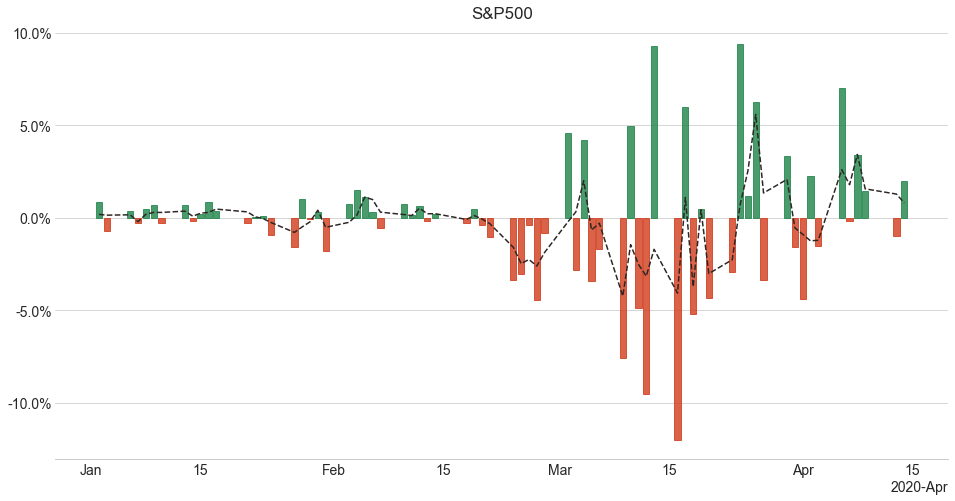

In [33]:
fig, ax = plt.subplots()
out = my_plotter(fig, ax, df, '2020-01', '2020-05', 'S&P500')

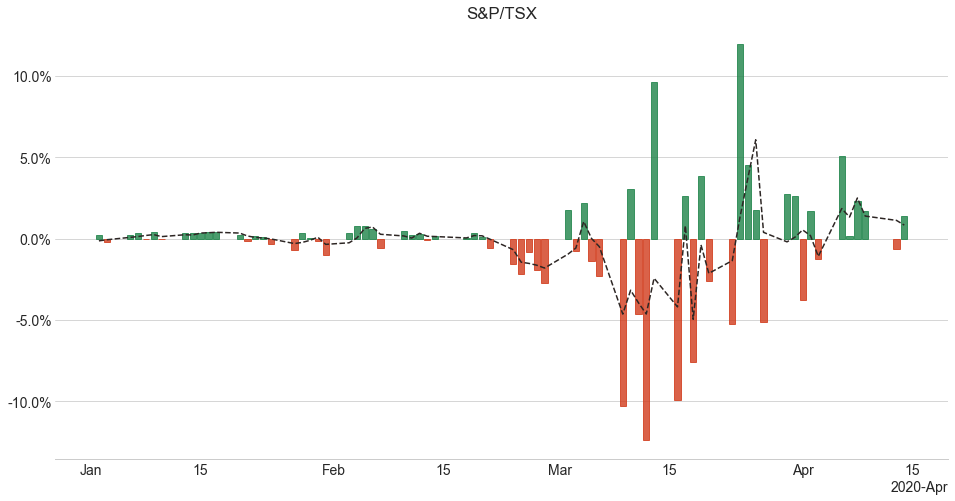

In [34]:
fig, ax = plt.subplots()
out = my_plotter(fig, ax, dft, '2020-01', '2020-05', 'S&P/TSX')

# TSLA vs normal stock over a year

In [60]:
tsla = yf.download(tickers='TSLA', period='1y', interval='1d')
aapl = yf.download(tickers='AAPL', period='1y', interval='1d')
tsla.drop(columns=['Adj Close', 'Open', 'High', 'Low'], inplace = True)
aapl.drop(columns=['Adj Close', 'Open', 'High', 'Low'], inplace = True)
tsla.tail()
aapl.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Close,Volume
Date,,
2020-04-07,259.429993,50721800
2020-04-08,266.070007,42223800
2020-04-09,267.989990,40529100
2020-04-13,273.250000,32663400
2020-04-14,283.050995,20521116


In [67]:
tsla_origin = tsla.loc['20200302', 'Close']
aapl_origin = aapl.loc['20200302', 'Close']

In [68]:
tsla['Change over 1y'] = ((tsla['Close'] - tsla_origin) / tsla_origin) * 100
aapl['Change over 1y'] = ((aapl['Close'] - aapl_origin) / aapl_origin) * 100

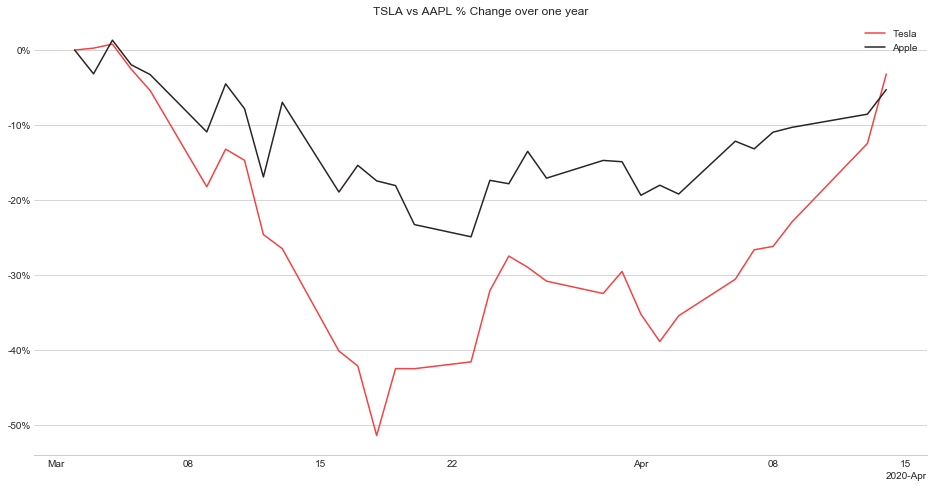

In [69]:
# %matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(16,8)
ax.plot(tsla.loc['20200301':].index, tsla.loc['20200301':, 'Change over 1y'], color='#f54242', linestyle='-', alpha=1, label='Tesla')
ax.plot(aapl.loc['20200301':].index, aapl.loc['20200301':, 'Change over 1y'], color='#2b2424', linestyle='-', alpha=1, label='Apple')
ax.yaxis.set_major_formatter(PercentFormatter())
ax.xaxis.set_major_locator(AutoDateLocator())
ax.xaxis.set_major_formatter(ConciseDateFormatter(AutoDateLocator()))
ax.grid(b=False, axis='x')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.legend()
txt_out = ax.set_title("TSLA vs AAPL % Change over one year")